# DS-GA 1003, Spring 2020, Section 3
# Gradient Descent

Artie Shen, CDS

In this lab, you will learn to:

- use Python to compute the gradient for two simple functions
- how to empirically check the correctness of your gradient computation
- implement a naive gradient descent algorithm 
- apply the algorithm on the UCI Automobile MPG dataset

## 1. Computing Gradients

Most numerical optimization methods require that we compute gradients of the loss function that we are attempting to minimize.  

In this section, we illustrate how to compute gradients efficiently in python for a few simple examples.  

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

### 1.1 Example 1: simple vector function

Let's consider a simple function:

$$f(\mathbf{\theta}) = \theta_0^2 + 2\theta_0 \theta_1^3$$ 

The gradient of this function can be computed as following:

$$\frac{\partial}{\partial \theta_0} = 2\theta_0 + 2\theta_1^3$$

$$\frac{\partial}{\partial \theta_1} = 6\theta_0\theta_1^2$$

$$\nabla f(\mathbf{\theta}) = \begin{bmatrix} 2\theta_0 + 2\theta_1^3 \\ 6\theta_0\theta_1^2 \end{bmatrix}$$



In [28]:
def simple_vector_func(theta):
    """
    Function that returns the value and gradient for a given theta vector
    @param theta: 2d numpy array [theta_0, theta_1]
    @out: f(\theta), gradient of f(\theta)
    """
    # unpack vector
    theta_0, theta_1 = theta
    
    # compute the value
    y_val = np.power(theta_0,2) + 2*theta_0* np.power(theta_1,3)

    # compute the gradient
    gradient_theta0 = 2*theta_0 + 2*np.power(theta_1,3)
    gradient_theta1 = 6*theta_0*np.power(theta_1,2)
    gradient = np.array([gradient_theta0, gradient_theta1])
    return y_val, gradient

Let's run this function for some random $\theta$.

In [29]:
theta = np.array([2,3])
y_val, grad = simple_vector_func(theta)
print("y_val={0}, grad={1}".format(y_val, grad))

y_val=112, grad=[ 58 108]


### 1.2 Example 2: least squares

Say that we have a linear model 

$$f(\mathbf{x}) = \theta \cdot \mathbf{x} = \theta_1 x_1 + \theta_2 x_2 + ... + \theta_d x_d$$

for a data point $\mathbf{x}_i \in \mathbb{R}^d$ and a parameter set $\theta \in \mathbb{R}^d$.

Now, given a single label $y_i \in \mathbb{R}$, we want to calcuate the $l_2$ loss:

$$J(\theta) = |f(\mathbf{x}) - y|_2^2$$

So what is the gradient of $J(\theta)$?

$$\nabla J(\theta) = 2\mathbf{x}(\mathbf{x} \cdot \mathbf{\theta} - y)$$

In [30]:
def l2_loss_linear_func(theta, x, y):
    """
    Function that returns the value and gradient for a given theta vector
    @param theta: nd numpy array [theta_1, theta_2, ..., theta_n]
    @param x: same dimension as theta
    #param y: a real number
    @out: f(\theta), gradient of f(\theta)
    """
    # compute the value
    y_val = np.power(np.dot(theta, x) - y, 2)

    # compute the gradient
    gradient = 2 * x * (np.dot(theta,x) - y)
    return y_val, gradient

In [31]:
theta = np.array([1,2,3,4,5])
x_i = np.array([1,2,3,4,5])
y_i = 99
y_val, grad = l2_loss_linear_func(theta, x_i, y_i)
print("y_val={0}, grad={1}".format(y_val, grad))

y_val=1936, grad=[ -88 -176 -264 -352 -440]


### 1.3 Testing the gradient

So far we have worked with relatively simple functions where it is straight-forward to compute the gradient. For more complex functions, the gradient computation can be notoriously difficult to debug and get right.

It is very important to test if the gradient is correct. Recall the mathematical definition of the derivative as:
$$ \frac{\partial}{\partial \theta} f(\theta) = \text{lim}_{\epsilon \to 0} \frac{f(\theta + \epsilon) - f(\theta - \epsilon) }{2 \epsilon}$$

We can approximate the gradient (left hand side) using the equation on the right hand side by setting $\epsilon$ to a small constant, say around $10^{−4}$.

Now let's expand this method to deal with vector input $\theta \in \mathbb{R}^d$. Let's say we want to verify out gradient at demension $i$ $(\nabla f(\theta))_i$. We can make use of one-hot vector $e_i$ in which all dimension except the $i$th are 0 and the $i$th dimension has a value of 1: 

$$e_i = \begin{bmatrix} 0\\ 0\\ ...\\ 1\\ ... \\0 \end{bmatrix}$$

The gradient at $i$th dimension can be then approximated as 

$$ [\nabla f(\theta)]^{(i)} \approx \frac{f(\theta + \epsilon e_i)-f(\theta - \epsilon e_i)}{2 \epsilon} $$

We can then calculate the approximation for all dimension.


More information about the gradient checker can be found at http://deeplearning.stanford.edu/tutorial/supervised/DebuggingGradientChecking/.

**Coding Exercise**: implement the gradient checker.

In [32]:
def approxiate_gradient(f_theta, theta, epsilon=1e-5):
    """
    Function that performs the gradient approximation using the above logic
    @param: f_theta, a function that calculates f(theta) and gradient
    @param: theta, a numpy array
    @output: the approximated value of the gradient at theta
    """
    n_dim = len(theta)
    gradient = np.zeros(n_dim)
    
    # iterate through all n dimension
    for i in range(n_dim):
        # construct e_i
        e_i = np.zeros(n_dim)
        e_i[i] = 1
        # calcualte f(theta+epsilon) and f(theta-epsilon)
        f_plus, _ = f_theta(theta + e_i * epsilon)
        f_minus, _ = f_theta(theta - e_i * epsilon)
        # calculate the approximated gradient at dimension i
        gradient[i] = (f_plus-f_minus)/(2*epsilon)
    return gradient

Let's use this function to verify that our gradient calculation in the two examples above is correct.

In [33]:
theta = np.array([2,3])
_, grad = simple_vector_func(theta)
grad_approx = approxiate_gradient(simple_vector_func, theta)
print("Gradient (calculated by hand): ", grad)
print("Gradient (approximated): ", grad_approx)

Gradient (calculated by hand):  [ 58 108]
Gradient (approximated):  [ 58. 108.]


In [34]:
theta = np.array([1,2,3,4,5])
x_i = np.array([1,2,3,4,5])
y_i = 99
y_val, grad = l2_loss_linear_func(theta, x_i, y_i)
# here because l2_loss_linear_func also takes in x_i and y_i
# we need to use lambda to wrap the value of x_i and y_i
grad_approx = approxiate_gradient(lambda theta: l2_loss_linear_func(theta, x_i, y_i), theta)
print("Gradient (calculated by hand): ", grad)
print("Gradient (approximated): ", grad_approx)

Gradient (calculated by hand):  [ -88 -176 -264 -352 -440]
Gradient (approximated):  [ -88.00000003 -175.99999999 -264.00000002 -351.99999999 -440.00000001]


## 2. Gradient Descent

Now that we know how to calculate and verify the gradients, let's code up a gradient decendent function. We will use the slide in lab2 as the reference.

For simplicity, let's assume that we are using a fixed learning rate and our termination condition is terminating at a fixed number of iterations.

**Coding Exercise**: implement the gradient descent algorithm.

In [9]:
def gradient_descent(f_theta, theta_0, lr=1e-3, n_iteration=1000):
    """
    Simple gradient descent optimization
    @param f_theta: a function that returns f(x) and its gradient
    @param theta_0: initial estimate
    @param lr: learning rate
    @param n_iteration: number of iterations
    """
    # create history dictionary for tracking progress per iteration.
    hist = {'theta': [], 'f_theta': []}
    
    # initialize theta_0
    theta_i =  theta_0
    
    # loop over iterations
    for i in range(n_iteration):
        # calculate the gradient
        f_val, f_grad = f_theta(theta_i)
        
        # save history
        hist['theta'].append(theta_i)
        hist['f_theta'].append(f_val)
        
        # update
        theta_i = theta_i - lr * f_grad
    return theta_i, hist

Let's test our implementation on a very simple example:

$$f(\theta) = \theta^2 - 2 \theta + 1$$

where $\theta \in \mathbb{R}$ is a real number.

We know that

$$\theta^* = \text{argmin}_{\theta} f(\theta) = 1$$

In [10]:
f_quad = lambda theta: (np.power(theta,2)-2*theta+1, 2*theta-2)
theta_init = np.random.randn()
theta_star, hist = gradient_descent(f_quad, theta_init, lr=1e-2)
print("Initial theta = {0}, Optimal theta_star = {1}".format(theta_init,theta_star))

Initial theta = -0.2962179037136742, Optimal theta_star = 0.9999999978185078


Let visualize how gradient descent decreases the function value at each iteration.

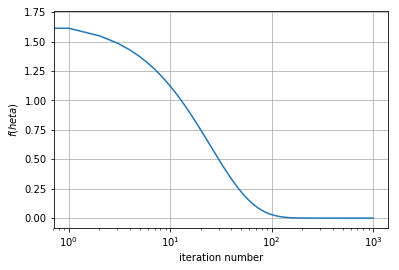

In [11]:
t = np.arange(1000)
plt.semilogx(t, hist['f_theta'])
plt.xlabel("iteration number")
plt.ylabel("$f( \theta )$")
plt.grid()

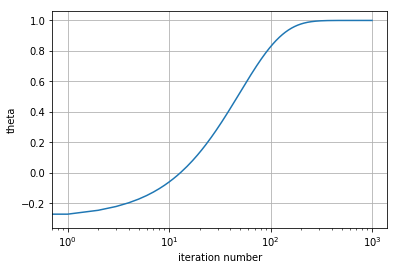

In [12]:
t = np.arange(1000)
plt.semilogx(t, hist['theta'])
plt.xlabel("iteration number")
plt.ylabel("theta")
plt.grid()

### 2.1 Impact of learning rate

In the previous example, we use a fixed learning rate through all iterations. The choice of learning rate has a very significant impact on the result. In the code block below, we run the optimization using 4 different learning rate.

lr = 1, theta* = 12, f(theta*) = 121
lr = 0.1, theta* = 0.9999999999999998, f(theta*) = 0.0
lr = 0.01, theta* = 0.99999998110955, f(theta*) = 3.3306690738754696e-16
lr = 0.001, theta* = -0.4886871211558325, f(theta*) = 2.2161893446952403
lr = 0.0001, theta* = -8.007659672808668, f(theta*) = 81.13793278114355


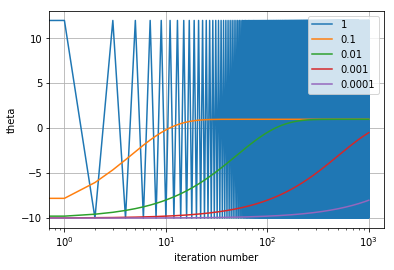

In [13]:
lr_list = [1, 0.1, 0.01, 0.001, 0.0001]
theta_init = -10

for lr in lr_list:
    # run the optimizer
    theta_star, hist = gradient_descent(f_quad, theta_init, lr)   
    # plot the learning curve
    plt.semilogx(np.arange(1000), hist['theta'], label=str(lr))
    plt.xlabel("iteration number")
    plt.ylabel("theta")
    # report 
    print("lr = {0}, theta* = {1}, f(theta*) = {2}".format(lr, hist["theta"][-1], hist["f_theta"][-1]))
    
plt.grid()
plt.legend(loc='upper right')
plt.show()

Question: How does the output looks like when the learning rate is too large/small? Why?

From the plot above, we know that gradient descent gives us bad results if the learning rate is too large/small. Can we improve the result by letting the algorithm to adjust the learning rate during each iteration?

**Coding Exercise**: implement the gradient descent algorithm with the Armijo's rule introduced in the slides.

In [14]:
def gradient_descent_armijo(f_theta, theta_0, lr=1e-3, n_iteration=1000):
    """
    Simple gradient descent optimization with learning rate adjusted using Armijo's rule
    @param f_theta: a function that returns f(x) and its gradient
    @param theta_0: initial estimate
    @param lr: learning rate
    @param n_iteration: number of iterations
    """
    # create history dictionary for tracking progress per iteration.
    hist = {'lr':[], 'theta': [], 'f_theta': []}
    
    # initialize theta_0
    theta_i =  theta_0
    
    # loop over iterations
    for i in range(n_iteration):
        # calculate the gradient
        f_val, f_grad = f_theta(theta_i)
        
        # calculate the next theta with this gradient
        theta_i_plus_1 = theta_i - lr * f_grad
        f_val_next, _ = f_theta(theta_i_plus_1)
        
        # calculate the required improvement
        if isinstance(f_grad, np.ndarray):
            df_est = lr*f_grad.dot(f_grad)
        else:
            df_est = lr*f_grad*f_grad
        
        # if the improvement is significant, perform the update and increase learning rate
        if (f_val_next < f_val - 0.5*df_est):
            lr *= 2
            accept = True
        # if the improvement is insignificant, don't do the update and decrease learning rate
        else:
            lr /= 2 
            accept = False
        
        if accept:
            # do update
            theta_i = theta_i - lr * f_grad
            # save history
            hist['theta'].append(theta_i)
            hist['f_theta'].append(f_val)
            hist['lr'].append(lr)
    return theta_i, hist

Now let's see if the improved gradient descent can work for initial learning rate that are too large/small.

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


lr = 1, theta* = 1.0, f(theta*) = 121
lr = 0.1, theta* = 1.0000000081690243, f(theta*) = 2.220446049250313e-16
lr = 0.01, theta* = 1.0000000101838715, f(theta*) = 1.3322676295501878e-15
lr = 0.001, theta* = 1.0000000006143954, f(theta*) = 6.661338147750939e-16
lr = 0.0001, theta* = 0.9999999978166156, f(theta*) = 1.1102230246251565e-16


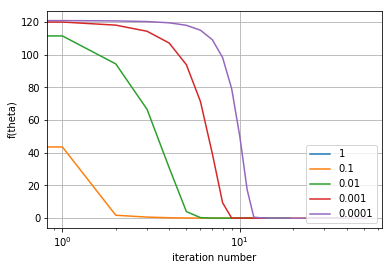

In [15]:
lr_list = [1, 0.1, 0.01, 0.001, 0.0001]
theta_init = -10

for lr in lr_list:
    # run the optimizer
    theta_star, hist = gradient_descent_armijo(f_quad, theta_init, lr)   
    # plot the learning curve
    plt.semilogx(np.arange(len(hist['f_theta'])), hist['f_theta'], label=str(lr))
    plt.xlabel("iteration number")
    plt.ylabel("f(theta)")
    # report 
    print("lr = {0}, theta* = {1}, f(theta*) = {2}".format(lr, hist["theta"][-1], hist["f_theta"][-1]))
    
plt.grid()
plt.legend(loc='lower right')
plt.show()

## 3. Application: linear regression on the Automobile mpg dataset

In this part, we will use the gradient descent algorithm to optimize a linear regression model on the Automobile mpg dataset. This dataset is a survey of cars to determine the relation of mpg to engine characteristics.  The data can be found in the UCI library:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg.

In [16]:
from sklearn.linear_model import LinearRegression

We first load the dataset into a dataframe.

In [17]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

In this part, we would like to use the **horsepower**, **weight**, and **displacement** of a car to predict its mile per gallon (**mpg**). Let's extract columns that are relevant to this task and perform some basic standarization.

In [18]:
need_df = df[["mpg", "horsepower", "weight", "displacement"]].dropna()
need_df["horsepower"] = (need_df["horsepower"]-np.mean(need_df["horsepower"]))/np.std(need_df["horsepower"]) 
need_df["weight"] = (need_df["weight"]-np.mean(need_df["weight"]))/np.std(need_df["weight"])
need_df["displacement"] = (need_df["displacement"]-np.mean(need_df["displacement"]))/np.std(need_df["displacement"])
need_df["mpg"] = (need_df["mpg"]-np.mean(need_df["mpg"]))/np.std(need_df["mpg"]) 

In [19]:
X = need_df.drop(columns=["mpg"]).values
Y = need_df["mpg"].values
print(X.shape)
print(Y.shape)

(392, 3)
(392,)


To formulate our problem, we would like find $\mathbf{\theta}^*=\begin{bmatrix} \theta_h^* \\ \theta_w^* \\ \theta_d^* \end{bmatrix}$ that minimizes the training error 
$$\hat{J}(\mathbf{\theta})=\frac{1}{n} \sum_{i}^n (\theta \cdot \mathbf{x}_i - y_i)^2 $$

for all $(\mathbf{x}_i, y_i) \in \mathcal{D}_n$, where $\mathbf{x}_i \in \mathbb{R}^3$, $y_i \in \mathbb{R}$ and $\mathcal{D}_n$ is our training data. For the purpose of this lab, we only care about the training error. Let's assume that we don't use any intercept.

Let's first use Sklearn to perform the linear regression.

In [20]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X,Y)
print(reg.intercept_, reg.coef_)

0.0 [-0.20552013 -0.58240258 -0.07734423]


In [21]:
pred = reg.predict(X)
training_error = np.mean(np.square(pred-Y))
print(training_error)

0.2930445306555292


Now let's define a function ``mpg_l2_loss`` that takes in a $\theta \in \mathbb{R}^3$ and calculate $J(\theta)$ and $\nabla J(\theta)$.

Remember that:

$$\nabla \hat{J}(\theta) = \frac{1}{n}2X^T(X\theta - Y)$$

where $X \in \mathbb{R}^{n \times 3}$ denotes the training set and $Y \in \mathbb{R}^{n}$ denotes the training label.

**Coding Exercise**: code up the function that calculate the l2 loss and gradient of it on the mpg dataset.

In [22]:
def mpg_l2_loss(theta, X=X, Y=Y):
    """
    Function that calculate the l2 loss on the mpg dataset
    @param theta: a numpy array with 3 elements
    @param X, Y: use the default value
    @return: the mean l2 loss over the dataset, the gradient 
    """
    n, _ = X.shape
    pred = np.dot(X, theta)
    loss_val = np.mean(np.square(pred-Y))
    grad = 2 * np.matmul(X.T, (np.matmul(X,theta) - Y)) / n
    return loss_val, grad

Let's apply our gradient descent implemention on this dataset.

In [23]:
theta_init = np.random.randn(3)
lr = 1e-3
theta_star, hist = gradient_descent_armijo(mpg_l2_loss, theta_init, lr) 

In [24]:
print("Our GD gives parameter:", theta_star)
print("Sklearn's parameter:", reg.coef_)

Our GD gives parameter: [-0.20552009 -0.58240248 -0.07734437]
Sklearn's parameter: [-0.20552013 -0.58240258 -0.07734423]


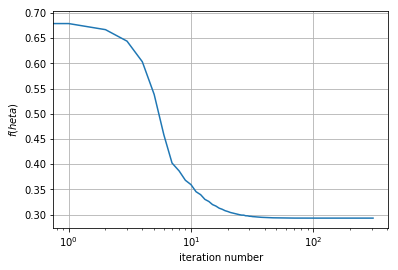

In [25]:
plt.semilogx(np.arange(len(hist['f_theta'])), hist['f_theta'])
plt.xlabel("iteration number")
plt.ylabel("$f( \theta )$")
plt.grid()

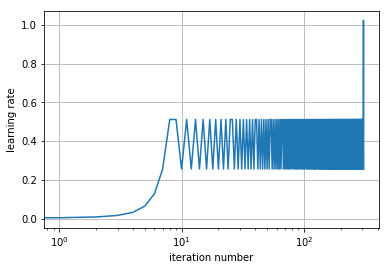

In [26]:
plt.semilogx(np.arange(len(hist['lr'])), hist['lr'])
plt.xlabel("iteration number")
plt.ylabel("learning rate")
plt.grid()